
# 2 - Data exploration


In [1]:
# import parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

## 2.1 Incidents data overview

In [2]:
incidents = pd.read_excel('../data/incidents_2019-08-09/hl2010toPresent.xlsx', 
                          sheet_name=1)

incidents.sample(5)

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
2239,2019-07-31 08:37:40,YES,NO,YES,YES,NO,20150373,23043,2015-10-23 10:21:08,SUPPLEMENTAL FINAL,...,SENIOR COMPLIANCE SPECIALIST,cstrickler@buckeye.com,610-904-4410,NaN,2018-01-15,CLAUDIA PANKIOWSK,DIRECTOR REGULATORY COMPLIANCE,610-904-4113,cpankowski@buckeye.com,"AT 9/23/2015 14:00, LOCAL BUCKEYE OPERATIONS P..."
1390,2019-07-31 08:37:40,YES,NO,NO,NO,NO,20130368,19512,2013-11-15 09:38:03,SUPPLEMENTAL FINAL,...,DOT COORDINATOR,m.todd.fuksa@p66.com,832-765-1632,NaN,2014-06-26,TODD TULLIO,MANAGER REGULATORY COMPLIANCE,832-765-1636,todd.l.tullio@p66.com,AFTER HEAVY RAINS OPERATIONS WERE INVESTIGATIN...
3110,2019-07-31 08:37:40,NO,NO,YES,YES,NO,20170359,23065,2017-11-08 09:35:52,SUPPLEMENTAL FINAL,...,HES PROFESSIONAL,dmshay@marathonpetroleum.com,419-421-2121,NaN,2018-01-24,RANDALL W. BISHOP,REGULATORY AND COMPLIANCE SUPERVISOR,419-421-2121,rwbishop@marathonpetroleum.com,"ON OCTOBER 12, 2017 CONTRACT CREWS WERE ON-SIT..."
831,2019-07-31 08:37:40,YES,NO,NO,NO,NO,20120176,18304,2012-06-08 09:23:09,SUPPLEMENTAL FINAL,...,COMPLIANCE SPECIALIST,hsandler@buckeye.com,610-904-4916,610-904-4545,2013-07-19,JOHN REINBOLD,COMPLIANCE MANAGER,610-904-4185,jreinbold@buckeye.com,"AT APPROXIMATELY 14:18 ON APRIL 5, 2012, A STA..."
646,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20110444,17550,2011-12-10 14:09:22,SUPPLEMENTAL FINAL,...,DOT COMPLIANCE ADVISOR,fitzsl@bp.com,281-217-3703,630-420-5519,2013-03-15,MICHAEL SANDERS,DOT TEAM LEADER - AFFILIATES,630-536-3495,sandm9@bp.com,"ON NOVEMBER 21, 2011, A TERMINAL TECHNICIAN WA..."


In [3]:
incidents['NAME'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          276
ENTERPRISE PRODUCTS OPERATING LLC      214
SUNOCO PIPELINE L.P.                   211
PLAINS PIPELINE, L.P.                  203
MAGELLAN PIPELINE COMPANY, LP          180
COLONIAL PIPELINE CO                   177
BUCKEYE PARTNERS, LP                   148
PHILLIPS 66 PIPELINE LLC               121
KINDER MORGAN LIQUID TERMINALS, LLC    117
MARATHON PIPE LINE LLC                 111
Name: NAME, dtype: int64

In [4]:
incidents['OPERATOR_ID'].value_counts().head(10)

30829    282
31618    214
18718    211
300      202
22610    180
2552     177
31684    155
1845     148
26041    117
32109    112
Name: OPERATOR_ID, dtype: int64

In [5]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

There seem to be some minor discrepancies between ID and name. Matching every ID to its most common company name should fix it. 

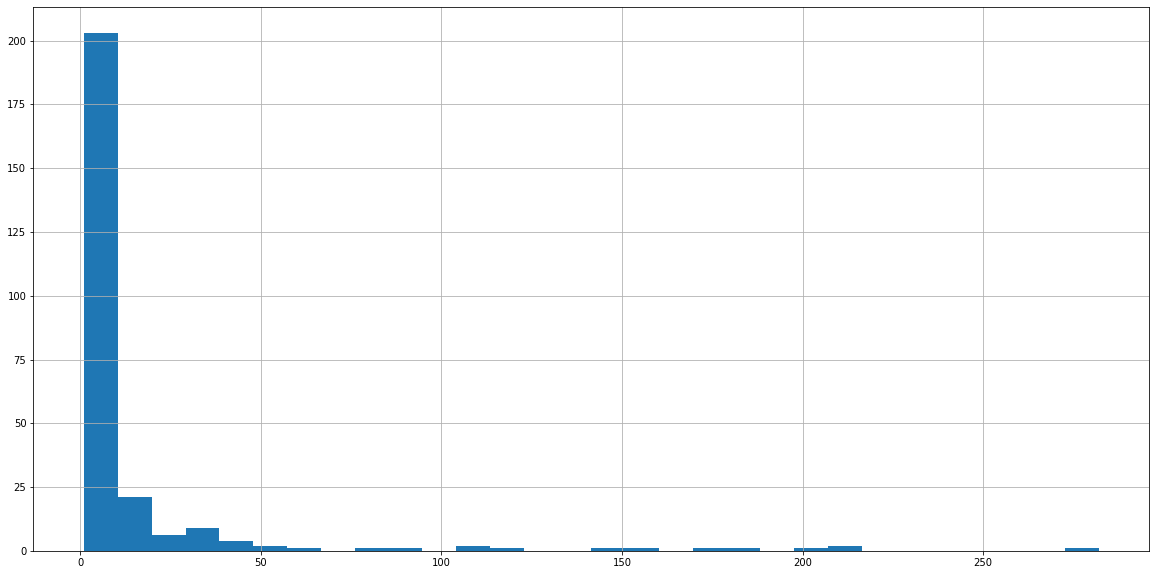

In [6]:
incidents['OPERATOR_ID'].value_counts().hist(bins=30, figsize=(20, 10))

In [7]:
len(incidents)

3819

## 2.2 Oil pipeline data

In [8]:
oil_pipelines = pd.read_excel('../data/pipelines_2010_present_2019-08-09/annual_hazardous_liquid_2010.xlsx', skiprows=2)

oil_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
205,2019-08-01 13:10:42,2010,20110014,11084,30901,AIRCRAFT SERVICES INTERNATIONAL GROUP (ASIG),6000 DEHAVILLAND DRIVE,ANCHORAGE,AK,99502,...,0.0,0.0,0.0,7.10,7.10,0.00,SUPPLEMENTAL,2011-07-28 18:23:42,2012-05-15 14:03:24,7000-1.1 (Rev. 06-2011)
147,2019-08-01 13:10:42,2010,20110317,10379,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",500 DALLAS,HOUSTON,TX,77002,...,0.0,0.0,0.0,0.73,0.73,0.00,SUPPLEMENTAL,2011-08-15 17:28:04,2011-08-16 11:33:05,7000-1.1 (Rev. 06-2011)
100,2019-08-01 13:10:42,2010,20110252,11573,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,"1100 LOUISIANA, SUITE 3300",HOUSTON,TX,77002,...,0.0,0.0,0.0,665.00,125.00,540.00,SUPPLEMENTAL,2011-08-15 12:19:29,2012-08-30 14:09:03,7000-1.1 (Rev. 06-2011)
345,2019-08-01 13:10:42,2010,20110233,12404,31874,"TESORO REFINING & MARKETING C O., GOLDEN EAGLE",19100 Ridgewood Parkway,San Antonio,TX,78259,...,0.0,0.0,0.0,4.14,0.79,3.35,SUPPLEMENTAL,2011-08-15 10:48:39,2013-07-29 11:02:21,7000-1.1 (Rev. 06-2011)
202,2019-08-01 13:10:42,2010,20110270,10276,30826,WILLIAMS FIELD SERVICES,One Williams Center,Tulsa,OK,74172,...,0.0,0.0,0.0,36.00,36.00,0.00,INITIAL,2011-08-15 14:13:40,2011-08-15 14:13:40,7000-1.1 (Rev. 06-2011)


In [9]:
from os import listdir

pipeline_files = [file for file in listdir('../data/pipelines_2010_present_2019-08-09/') if'annual_hazardous_liquid' in file]
pipeline_files

['annual_hazardous_liquid_2017.xlsx',
 'annual_hazardous_liquid_2011.xlsx',
 'annual_hazardous_liquid_2014.xlsx',
 'annual_hazardous_liquid_2012.xlsx',
 'annual_hazardous_liquid_2013.xlsx',
 'annual_hazardous_liquid_2010.xlsx',
 'annual_hazardous_liquid_2018.xlsx',
 'annual_hazardous_liquid_2016.xlsx',
 'annual_hazardous_liquid_2015.xlsx']

In [10]:
pipelines = pd.concat([pd.read_excel(f'../data/pipelines_2010_present_2019-08-09/{file}', skiprows=2) for file in pipeline_files])
pipelines = pipelines.reset_index(drop = True)

pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
1154,2019-08-01 13:14:22,2011,20120473,11546,32582,"LIBERTY PIPELINE GROUP, LLC","1200 Smith Street, Suite 2300",HOUSTON,TX,77002,...,87.000,0.0,87.000,87.000,87.00,0.000,INITIAL,2012-07-27 12:48:38,2012-07-27 12:48:38,7000-1.1 (Rev. 06-2011)
4454,2019-08-01 13:52:01,2016,20172432,14787,32388,"LINN OPERATING, INC","600 TRAVIS, SUITE 5100",HOUSTON,TX,77002,...,0.000,0.0,0.000,0.000,0.00,0.000,INITIAL,2017-05-09 11:29:32,2017-05-09 11:29:32,7000-1.1 (Rev. 06-2014)
993,2019-08-01 13:14:22,2011,20120037,11056,31721,PIPELINE TECHNOLOGY,1048 FLORIDA STREET,BATON ROUGE,LA,70802,...,0.000,0.0,0.000,22.000,22.00,0.000,INITIAL,2012-05-04 12:36:10,2012-05-04 12:36:10,7000-1.1 (Rev. 06-2011)
1814,2019-08-01 13:19:08,2012,20130175,12423,3445,DIXIE PIPELINE COMPANY LLC,1100 LOUISIANA ST.,HOUSTON,TX,77002,...,1.444,0.0,1.444,1277.669,508.79,768.879,SUPPLEMENTAL,2013-06-07 10:14:12,2013-08-06 11:09:01,7000-1.1 (Rev. 06-2011)
2824,2019-08-01 13:23:46,2013,20141040,13067,38964,PHILADELPHIA ENERGY SOLUTIONS REFINING AND MAR...,1735 MARKET STREET,PHILADELPHIA,PA,19103,...,0.000,0.0,0.000,1.420,1.42,0.000,INITIAL,2014-06-15 23:39:38,2014-06-15 23:39:38,7000-1.1 (Rev. 06-2011)


See which company has the vastest pipeline network.

In [11]:
pipelines.loc[pipelines.groupby('OPERATOR_ID')['PARTBHCATOTAL'].idxmax()].nlargest(10, 'PARTBHCATOTAL')[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA2NAMEOFCOMP', 'PARTBHCATOTAL']]

,REPORT_YEAR,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTBHCATOTAL
3634,2018,31618,ENTERPRISE PRODUCTS OPERATING LLC,7726.183
3704,2018,32109,"ONEOK NGL PIPELINE, LLC",4531.480
4723,2015,2552,COLONIAL PIPELINE CO,4500.920
4715,2015,1845,"BUCKEYE PARTNERS, LP",4266.430
3484,2018,22610,"MAGELLAN PIPELINE COMPANY, LP",3926.400
4135,2016,15674,PLANTATION PIPE LINE CO,2564.730
4035,2016,300,"PLAINS PIPELINE, L.P.",2312.330
67,2017,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2290.000
3186,2010,31684,CONOCOPHILLIPS,2283.790
2693,2013,32147,MARATHON PIPE LINE LLC,2281.900


In [12]:
pipelines['PARTA5COMMODITY'].unique()

array(['Crude Oil', 'HVL', 'Refined and/or Petroleum Product (non-HVL)',
       'CO2', 'Fuel Grade Ethanol (dedicated system)'], dtype=object)

Compare to

In [13]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

The types correspond well, but the terminology is different.

## 2.3 Gas pipelines

In [14]:
gas_pipelines = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2015.xlsx', skiprows=1)

gas_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
8,2019-08-01 14:19:07,2015,20160278,547,1800,KEYSPAN ENERGY DELIVERY - NY CITY,National Grid,Thomas kennedy,"Manager, NY LNG",Thomas.Kennedy@NationalGrid.com,...,02451,INITIAL,2016-02-19 13:12:07,2016-02-19 13:12:07,7100.3-1 (Rev. 10-2014),Steve Sechovicz,Operator,stephen.sechovicz@nationalgrid.com,(617)822-5412,NaN
44,2019-08-01 14:19:07,2015,20160272,541,15469,PHILADELPHIA GAS WORKS,NaN,Curt Malkemes,"Director, Gas Processing",curt.malkemes@pgworks.com,...,19122,INITIAL,2016-02-10 09:42:40,2016-02-10 09:42:40,7100.3-1 (Rev. 10-2014),Curt Malkemes,"Director, Gas Processing",curt.malkemes@pgworks.com,(215)684-6416,NaN
73,2019-08-01 14:19:07,2015,20160254,518,32496,"DESERT GAS, LP.","Spectrum LNG, LLC",Bret Bartholomy,VP,bret@spectrumlng.com,...,74114,INITIAL,2016-01-11 09:34:03,2016-01-11 09:34:03,7100.3-1 (Rev. 10-2014),Bret Bartholomy,VP,bret@spectrumlng.com,(918)236-4100,NaN
81,2019-08-01 14:19:07,2015,20160295,654,39092,TITAN ALASKA LNG,NaN,Brendan Kern,Engineer,bkern@fngas.com,...,99701,SUPPLEMENTAL,2016-03-02 13:48:24,2017-01-31 16:09:28,7100.3-1 (Rev. 10-2014),Brendan Kern,Operator,bkern@fngas.com,(907)799-0987,NaN
42,2019-08-01 14:19:07,2015,20160282,551,15329,PEOPLES GAS LIGHT & COKE CO,"WEC Energy Group, Inc.",Thomas L. Puracchio,"Manager, Gas Storage",tlpuracchio@integrysgroup.com,...,60601,INITIAL,2016-02-22 08:48:50,2016-02-22 08:48:50,7100.3-1 (Rev. 10-2014),Charles Sikora,"Coordinator, Gas Storage",crsikora@integrysgroup.com,(217)897-7123,(218)897-1154


In [15]:
gas_files = [file for file in listdir('../data/gas_2010_present_2019-08-09/') if'annual_liquefied_natural_gas' in file]
gas_files

['annual_liquefied_natural_gas_2013.xlsx',
 'annual_liquefied_natural_gas_2011.xlsx',
 'annual_liquefied_natural_gas_2016.xlsx',
 'annual_liquefied_natural_gas_2012.xlsx',
 'annual_liquefied_natural_gas_2017.xlsx',
 'annual_liquefied_natural_gas_2018.xlsx',
 'annual_liquefied_natural_gas_2010.xlsx',
 'annual_liquefied_natural_gas_2014.xlsx',
 'annual_liquefied_natural_gas_2015.xlsx']

In [16]:
gas = pd.concat([pd.read_excel(f'../data/gas_2010_present_2019-08-09/{file}', skiprows=1) for file in gas_files[:3]], sort=False)
gas = gas.reset_index(drop = True)

gas.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
153,2019-08-01 14:12:58,2011,20120084,102,31770,NEW ENGLAND GAS COMPANY,Southern Union Company,Gary S. Munroe,Manager,gary.munroe@sug.com,...,02724,INITIAL,2012-06-08 12:09:49,2012-06-08 12:09:49,7100.3-1 (Rev. 06-2011),Gary Munroe,Manager,gary.munroe@sug.com,(508) 689-1170,(508) 673-4290
6,2019-08-01 14:16:07,2013,20140089,299,1344,BERKSHIRE GAS CO,UIL Holdings Corporation,David M. Grande,Director - Gas Engineering & System Oper,dgrande@berkshiregas.com,...,01201,INITIAL,2014-01-20 10:19:36,2014-01-20 10:19:36,7100.3-1 (Rev. 06-2011),David M. Grande,Director - Gas Engineering & System Operations,dgrande@berkshiregas.com,(413) 445-0265,(413) 445-0335
154,2019-08-01 14:12:58,2011,20120070,177,32152,"SABINE PASS LNG, L.P.","Cheniere Energy, Inc.",Ronald Tanner,"Vice President, Terminal Operations",Ronald.Tanner@cheniere.com,...,77002,SUPPLEMENTAL,2012-03-26 12:01:44,2013-02-26 16:10:54,7100.3-1 (Rev. 06-2011),James Kaucher,Plant Manager,James.Kaucher@cheniere.com,(337) 569-7701,(337) 569-7711
188,2019-08-01 14:20:39,2016,20170382,691,11856,COLONIAL GAS CO - LOWELL DIV,National Grid,Walter Doucette,"Director, LNG Mass North",Walter.DoucetteJr@nationalgrid.com,...,02451,INITIAL,2017-03-02 14:14:11,2017-03-02 14:14:11,7100.3-1 (Rev. 10-2014),Steve Sechovicz,Principle Engineer,stephen.sechovicz@nationalgrid.com,(617)822-5412,NaN
209,2019-08-01 14:20:39,2016,20170370,676,15938,PUBLIC SERVICE CO OF NORTH CAROLINA,SCANA CORPORATION,IRA DALE BRANHAM,MANAGER LNG OPERATIONS,ibranham@scana.com,...,28056,INITIAL,2017-02-24 14:07:58,2017-02-24 14:07:58,7100.3-1 (Rev. 10-2014),Dania Pool,Sr. Analyst - Engineering,dpool@scana.com,(704)810-3257,NaN


The warning stems from the fact that the PARTA4NAMEOFCOMP columns was dropped, starting from 2014 (see below). Fortunately, we can use the field "PARTA2NAMEOFCOMP" and "PARTA2NAMEOFPARENT_COM" to get the information.

In [17]:
gas_columns_2010 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2010.xlsx', skiprows=1, skipfooter=999).columns.tolist()
gas_columns_2014 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2014.xlsx', skiprows=1, skipfooter=999).columns.tolist()
set(gas_columns_2010) - set(gas_columns_2014)

{'PARTA4NAMEOFCOMP'}

## 2.4. Where do incidents occur? Regular, or LNG pipelines?

### 2.4.1 Are there operators who operate both regular and LNG pipelines?

In [18]:
gas_operators = np.unique(gas['OPERATOR_ID']).tolist()
gas_operators[:5]

[180, 630, 792, 909, 1088]

In [19]:
pipeline_operators = np.unique(pipelines['OPERATOR_ID']).tolist()
pipeline_operators[:5]

[300, 395, 401, 402, 473]

In [20]:
common_operators = set(gas_operators).intersection(set(pipeline_operators))
print(common_operators)

{31636}


Only one company occurs on both lists.

In [21]:
pipelines.loc[pipelines['OPERATOR_ID'].isin(common_operators) & (pipelines['REPORT_YEAR'] == 2017)]['PARTA2NAMEOFCOMP'].tolist()

['NORTHERN STATES POWER CO OF MINNESOTA']

### 2.4.2 Where do the accidents occur?

In [22]:
incidents.loc[incidents['OPERATOR_ID'] == 31636]

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE


Our common operators has no incidents, so we can ignore this segment.

In [23]:
regular_pipeline_incidents = incidents['OPERATOR_ID'].isin(pipelines['OPERATOR_ID']).sum()
regular_pipeline_incidents

3814

In [24]:
nlg_pipeline_incidents = incidents['OPERATOR_ID'].isin(gas['OPERATOR_ID']).sum()
nlg_pipeline_incidents

0

Looks like we can ignore this second dataset for our analysis.

## 2.5 Pipeline age - distribution and missingness

In [25]:
import rpy2.rinterface

In [26]:
%load_ext rpy2.ipython

In [27]:
pipelines_age = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTEUNKNTOTAL', 'PARTEPRE40TOTAL'] + 
                          [f'PARTE19{decade}0TOTAL' for decade in range(5,10)] + 
                          ['PARTE2000TOTAL', 'PARTE2010TOTAL', 'PARTETOTAL']]
pipelines_age.sample(5)

,OPERATOR_ID,REPORT_YEAR,PARTEUNKNTOTAL,PARTEPRE40TOTAL,PARTE1950TOTAL,PARTE1960TOTAL,PARTE1970TOTAL,PARTE1980TOTAL,PARTE1990TOTAL,PARTE2000TOTAL,PARTE2010TOTAL,PARTETOTAL
4532,38931,2016,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.00,0.00,0.000
2882,1541,2010,0.0,0.0,0.0,0.00,0.0,43.285,25.041,11.13,0.00,79.456
3583,31202,2018,0.0,0.0,0.0,13.34,0.0,0.000,27.000,13.81,3.78,57.930
34,2767,2017,0.0,0.0,0.0,30.54,0.0,37.300,12.170,0.37,0.00,80.380
3997,39806,2018,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.00,0.00,0.000


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



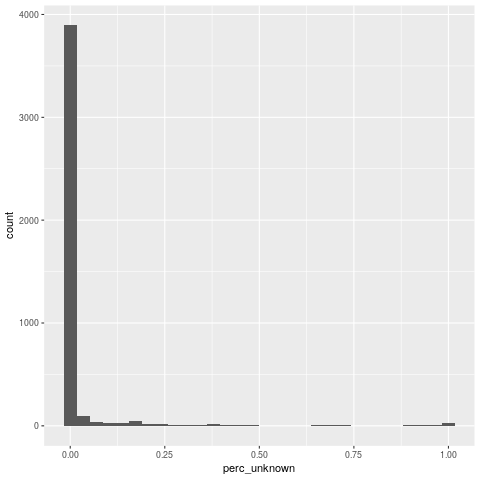

In [28]:
%%R -i pipelines_age
suppressMessages(library(tidyverse))

pipelines_age %>%
    group_by(OPERATOR_ID, REPORT_YEAR) %>%
    mutate(perc_unknown = PARTEUNKNTOTAL / PARTETOTAL) %>%
    ggplot(aes(x=perc_unknown)) + 
    geom_histogram()

Unknown age fortunately is not an issue.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



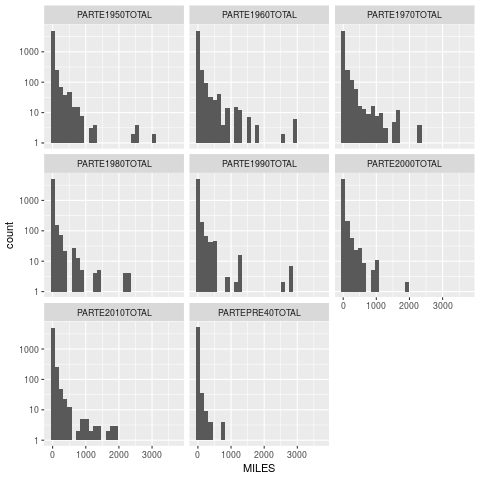

In [29]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    ggplot(aes(x=MILES)) + 
    geom_histogram() +
    facet_wrap(~DECADE, nrow=3) + 
    scale_y_log10()

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



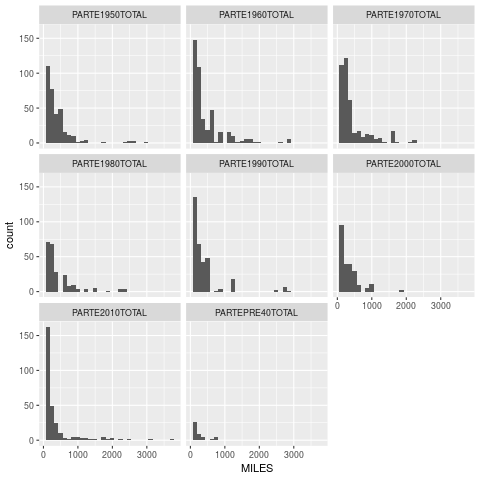

In [30]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    filter(MILES > 100) %>%
    ggplot(aes(x=MILES)) + 
    geom_histogram() +
    facet_wrap(~DECADE, nrow=3)

In [31]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    group_by(DECADE) %>%
    summarize(total_miles = sum(MILES))

# A tibble: 8 x 2
  DECADE          total_miles
  <chr>                 <dbl>
1 PARTE1950TOTAL      157897.
2 PARTE1960TOTAL      216401.
3 PARTE1970TOTAL      202377.
4 PARTE1980TOTAL      124982.
5 PARTE1990TOTAL      145727.
6 PARTE2000TOTAL      104471.
7 PARTE2010TOTAL      127693.
8 PARTEPRE40TOTAL      13968.


In [32]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    group_by(DECADE, REPORT_YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    spread(REPORT_YEAR, total_miles)

# A tibble: 8 x 10
# Groups:   DECADE [8]
  DECADE          `2010` `2011` `2012` `2013` `2014` `2015` `2016` `2017` `2018`
  <chr>            <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 PARTE1950TOTAL  18215. 17787. 18754. 18026. 16827. 17642. 17164. 16595. 16887.
2 PARTE1960TOTAL  25484. 25091. 24753. 24387. 23923. 23284. 23782. 23417. 22280.
3 PARTE1970TOTAL  23080. 23235. 22704. 22526. 22095. 21733. 22518. 22303. 22183.
4 PARTE1980TOTAL  13802. 13885. 13816. 14206. 13423. 13729. 14179. 14091. 13851.
5 PARTE1990TOTAL  16440. 16401. 16198. 16289. 15995. 16052. 16007. 15934. 16410.
6 PARTE2000TOTAL  11546. 11631. 11581. 11683. 10951. 11072. 11479. 11283. 13243.
7 PARTE2010TOTAL    484.  1686.  4072.  9935. 15081. 18591. 22780. 26051. 29014.
8 PARTEPRE40TOTAL     0      0      0      0   2550.  3007.  2905.  2791.  2716.


The distribution across decades is surprisingly balanced. Strong trends are not discernible, there is the construction of new pipelines, and some pre-1980 pipelines are being retired.

## 2.6 How much % is offshore?

In [33]:
pipeline_offshore = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTBHCAOFFSHORE', 'PARTBHCATOTAL', 'PARTA5COMMODITY']]

In [34]:
pipeline_offshore['PARTBHCAOFFSHORE'].isna().value_counts()

True     4676
False     633
Name: PARTBHCAOFFSHORE, dtype: int64

In [35]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    group_by(REPORT_YEAR) %>%
    summarize(perc_na = mean(is.na(PARTBHCAOFFSHORE)))

# A tibble: 9 x 2
  REPORT_YEAR perc_na
        <int>   <dbl>
1        2010   0.862
2        2011   0.869
3        2012   0.888
4        2013   0.859
5        2014   0.883
6        2015   0.893
7        2016   0.897
8        2017   0.863
9        2018   0.905


In [36]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    group_by(PARTA5COMMODITY) %>%
    summarize(perc_na = mean(is.na(PARTBHCAOFFSHORE)))

# A tibble: 5 x 2
  PARTA5COMMODITY                            perc_na
  <chr>                                        <dbl>
1 CO2                                          0.959
2 Crude Oil                                    0.779
3 Fuel Grade Ethanol (dedicated system)        1    
4 HVL                                          0.955
5 Refined and/or Petroleum Product (non-HVL)   0.926


In [37]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(missing_offshore = is.na(PARTBHCAOFFSHORE)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(perc_missing = sprintf("%0.1f", sum(missing_offshore) / n())) %>%
    {table(.$perc_missing)}


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 
 46   5   5   3   3   5   9  24  34  72 497 


In [38]:
%%R -i pipeline_offshore

pipeline_offshore %>% 
    #Picking a year at random
    filter(REPORT_YEAR == 2015) %>%
    mutate(perc_offshore = sprintf("%0.2f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    {table(.$perc_offshore)}


0.00 0.01 0.02 0.05 0.06 0.10 0.20 0.25 0.34 0.36 0.41 0.57 0.62 0.70 0.71 0.80 
  12    2    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0.84 0.85 0.86 0.91 0.99 1.00 
   1    1    1    1    1    4 


In [39]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    #Picking a year at random
    mutate(perc_offshore = sprintf("%0.1f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    {table(.$perc_offshore, .$REPORT_YEAR)}

     
      2010 2011 2012 2013 2014 2015 2016 2017 2018
  0.0   37   34   31   47   23   16   17   41   19
  0.1    5    4    2    4    3    2    3    3    3
  0.2    1    1    1    1    1    1    2    2    3
  0.3    2    3    2    3    2    2    1    0    0
  0.4    2    2    1    1    2    2    2    1    1
  0.5    0    0    0    0    0    0    1    1    1
  0.6    1    1    1    1    1    2    2    2    3
  0.7    2    2    1    1    1    2    1    2    3
  0.8    0    0    1    2    2    2    0    0    0
  0.9    4    5    5    3    2    3    3    3    2
  1.0    9   10   12   12    7    5    8    6    7


Are there any values close to 1, but not equal to 1?

In [40]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(perc_offshore = sprintf("%0.2f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    filter(perc_offshore > 0.8) %>%
    {table(.$perc_offshore, .$REPORT_YEAR)}

      
       2010 2011 2012 2013 2014 2015 2016 2017 2018
  0.80    0    0    1    1    1    1    0    0    0
  0.84    0    0    0    0    1    1    0    0    0
  0.85    0    0    0    0    0    1    1    0    0
  0.86    1    1    2    2    2    1    1    2    0
  0.87    1    1    0    0    0    0    0    0    0
  0.88    1    1    1    0    0    0    0    0    0
  0.91    1    1    1    0    0    1    1    1    1
  0.92    0    1    1    1    0    0    0    0    0
  0.94    0    0    0    0    0    0    0    0    1
  0.97    1    1    1    1    0    0    0    0    0
  0.99    0    0    1    1    0    1    1    1    0
  1.00    8    9   10   10    7    4    7    5    7


The presence of organizations that have a high share of offshore is somewhat concerning, because the data on the age of the pipelines does not differentiate between on and offshore. We could rectify this issue by removing any operators with offshore pipelines, since most operators do not have offshore pipelines. Let's see hwo many observations we would lose.

In [41]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    mutate(perc_offshore = sprintf("%0.2f", perc_offshore)) %>%
    {table(.$perc_offshore)}


0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.16 
5061    9    9    4    7    6    7    1    4    3    5    2    1    2    1    4 
0.17 0.19 0.20 0.21 0.24 0.25 0.29 0.30 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 
   1    2    3    2    1    7    2    1    4    1    5    1    1    1    2    3 
0.45 0.55 0.57 0.58 0.62 0.68 0.69 0.70 0.71 0.72 0.74 0.78 0.80 0.84 0.85 0.86 
   1    3    9    1    4    5    1    3    3    1    2    1    4    2    2   12 
0.87 0.88 0.91 0.92 0.94 0.97 0.99 1.00 
   2    3    7    3    1    4    5   67 


Looks like we can exclude offshore without losing too many observations.

In [42]:
%%R -i pipeline_offshore
pipeline_offshore %>%
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(offshore_max = max(perc_offshore)) %>%
    mutate(offshore_max = sprintf("%0.1f", offshore_max)) %>%
    {table(.$offshore_max)}


0.0 0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1.0 
660   5   2   2   2   2   2   1   6  21 


By setting a strict limit of no offshore, we will lose 43 out of 703 observations (organizations).

In [43]:
%%R -i pipeline_offshore
pipeline_offshore %>%
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(offshore_max = max(perc_offshore)) %>%
    filter(offshore_max < 0.1) %>%
    mutate(offshore_max = sprintf("%0.2f", offshore_max)) %>%
    {table(.$offshore_max)}


0.00 0.01 0.02 0.03 0.04 0.08 0.09 
 656    1    1    1    1    1    1 


More like 47 for a strict limit of 0.0.

## 2.7 FERC Notices

In [44]:
notices = pd.read_csv('../data/ferc_notices_2019-08-01.csv')

len(notices)

27890

Check whether any notes were read incorrectly (too many requests).

In [45]:
notices['full-text'].str.contains('too manyrequests').value_counts()

False    27890
Name: full-text, dtype: int64